---
## INFORME TARJETA DE CREDITO
---

In [17]:
# Importo librerias a utilizar
import numpy as np
import pandas as pd
import seaborn as sns # Importamos librerias de graficos
%matplotlib inline 
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("Creditcard.csv")
df.head(3)

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0


In [37]:
headers = ["ID", "Genero", "Auto", "Inmueble", "Telefono Laboral", "Telefono", "Email", "Desempleado", "Hijos", "Familia", "Saldo", "Ingreso", "Edad", "Antigüedad", "Tipo de Ingreso", "Educacion", "Estado Civil", "Tipo de Casa", "Empleo", "Target"]
df.columns = headers

In [38]:
df.sample(3)

,ID,Genero,Auto,Inmueble,Telefono Laboral,Telefono,Email,Desempleado,Hijos,Familia,Saldo,Ingreso,Edad,Antigüedad,Tipo de Ingreso,Educacion,Estado Civil,Tipo de Casa,Empleo,Target
6795,5100453,0,1,1,1,1,0,0,0,2,29,157500.0,27.603578,4.763958,Commercial associate,Incomplete higher,Married,House / apartment,Other,0
5510,5090363,0,0,1,0,0,0,0,0,2,56,67500.0,33.227239,3.427860,Working,Higher education,Married,House / apartment,Sales staff,1
8191,5125270,1,0,0,0,0,1,0,1,3,24,360000.0,34.538697,2.869327,Working,Lower secondary,Married,House / apartment,Laborers,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                9709 non-null   int64  
 1   Genero            9709 non-null   int64  
 2   Auto              9709 non-null   int64  
 3   Inmueble          9709 non-null   int64  
 4   Telefono Laboral  9709 non-null   int64  
 5   Telefono          9709 non-null   int64  
 6   Email             9709 non-null   int64  
 7   Desempleado       9709 non-null   int64  
 8   Hijos             9709 non-null   int64  
 9   Familia           9709 non-null   int64  
 10  Saldo             9709 non-null   int64  
 11  Ingreso           9709 non-null   float64
 12  Edad              9709 non-null   float64
 13  Antigüedad        9709 non-null   float64
 14  Tipo de Ingreso   9709 non-null   object 
 15  Educacion         9709 non-null   object 
 16  Estado Civil      9709 non-null   object 


---
**PROCESO**	
- [x] Cargar archivo, ver el contenido
- [x] Procesar y manipular los datos
- [ ] Aplicar algoritmos para estudiar los datos
---

In [43]:
df.Genero.value_counts()

0    6323
1    3386
Name: Genero, dtype: int64

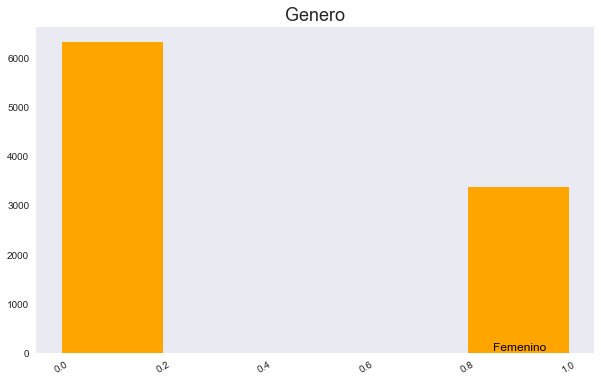

<Figure size 576x396 with 0 Axes>

In [94]:
df['Genero'].hist(bins=5, color='orange') # Vemos graficamente su distribución
plt.title('Genero', fontsize=18)
plt.grid(False)

plt.gcf().set_size_inches(10, 6)  # Tamaño de la figura (ancho, alto)
plt.style.use('seaborn')  # Cambiar un estilo predefinido de fondo(como 'ggplot', 'seaborn', etc.)
plt.xticks(rotation=30) # Para rotar las etiquetas del eje X porque si no se superponen unas con otras.

plt.text(x=0.85, y=50, s='Femenino', fontsize=12, color='black') # Agregue texto en la columna 2

plt.show()
plt.clf()

In [46]:
df.Educacion.value_counts()

Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: Educacion, dtype: int64

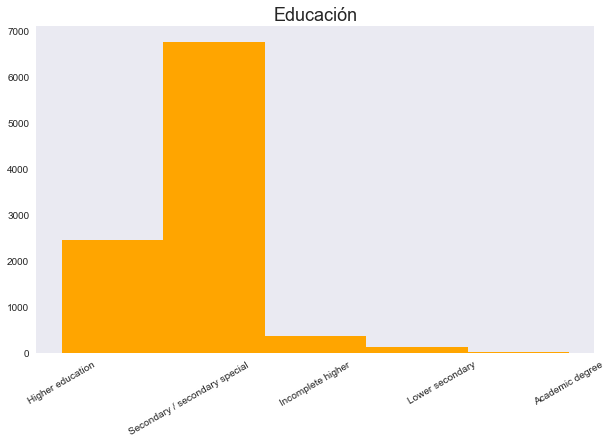

<Figure size 576x396 with 0 Axes>

In [77]:
df['Educacion'].hist(bins=5, color='orange') # Vemos graficamente su distribución
plt.title('Educación', fontsize=18)
plt.grid(False)

plt.gcf().set_size_inches(10, 6)  # Tamaño de la figura (ancho, alto)
plt.style.use('seaborn')  # Cambiar un estilo predefinido de fondo(como 'ggplot', 'seaborn', etc.)
plt.xticks(rotation=30) # Para rotar las etiquetas del eje X porque si no se superponen unas con otras.

plt.show()
plt.clf()

In [78]:
df.Hijos.value_counts()

0     6819
1     1886
2      852
3      126
4       18
5        5
19       1
14       1
7        1
Name: Hijos, dtype: int64

In [84]:
# Para intentar corregir estos valores extremos los reemplazo por otros mas habituales entendiendo que son pocos los outliers.
df.Hijos = df.Hijos.replace([19], 3)
df.Hijos = df.Hijos.replace([14], 2)
df.Hijos = df.Hijos.replace([7], 1)

In [85]:
df.Hijos.value_counts()

0    6819
1    1887
2     853
3     127
4      18
5       5
Name: Hijos, dtype: int64

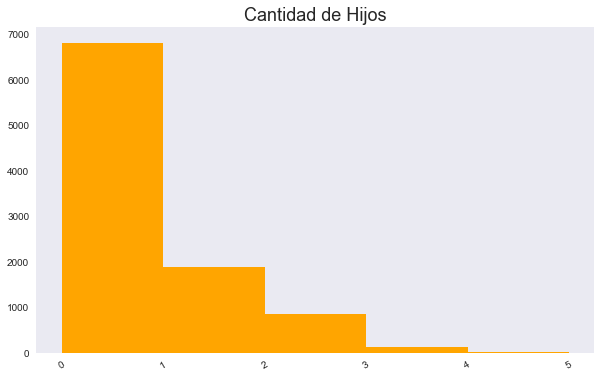

<Figure size 576x396 with 0 Axes>

In [86]:
df['Hijos'].hist(bins=5, color='orange') # Vemos graficamente su distribución
plt.title('Cantidad de Hijos', fontsize=18)
plt.grid(False)

plt.gcf().set_size_inches(10, 6)  # Tamaño de la figura (ancho, alto)
plt.style.use('seaborn')  # Cambiar un estilo predefinido de fondo(como 'ggplot', 'seaborn', etc.)
plt.xticks(rotation=30) # Para rotar las etiquetas del eje X porque si no se superponen unas con otras.

plt.show()
plt.clf()

---
**PROCESO**	
- [x] Cargar archivo, ver el contenido, preprocesarlo
- [x] Procesar y manipular los datos
- [x] Aplicar algoritmos para estudiar los datos
---

In [97]:
df.describe()

,ID,Genero,Auto,Inmueble,Telefono Laboral,Telefono,Email,Desempleado,Hijos,Familia,Saldo,Ingreso,Edad,Antigüedad,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.419302,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.728208,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


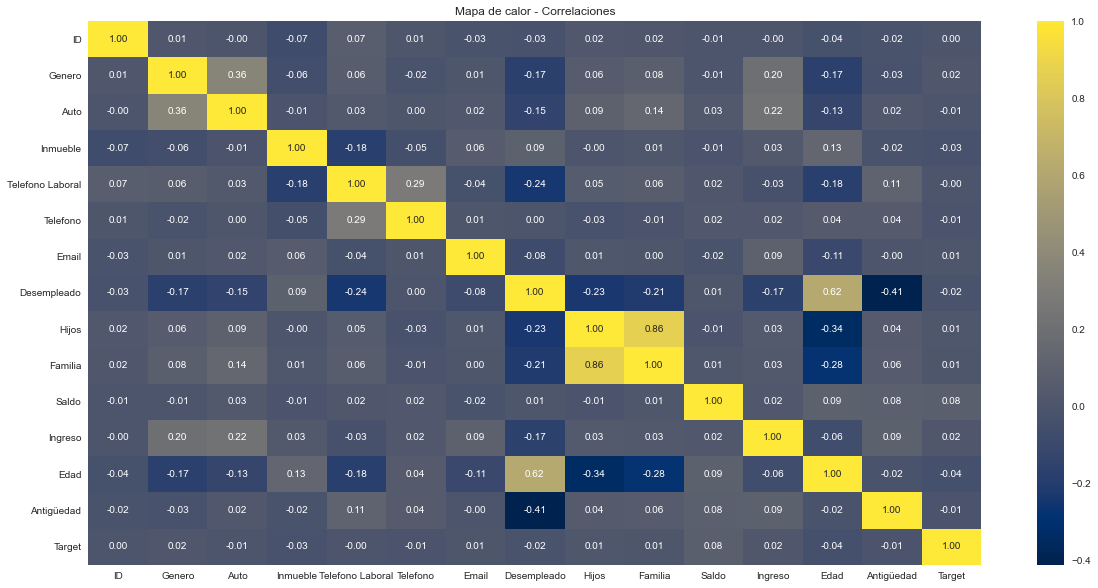

In [99]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='cividis')
plt.title('Mapa de calor - Correlaciones')
plt.show()